Insurance Regression using ANN
Dataset : https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: ylabel='Frequency'>

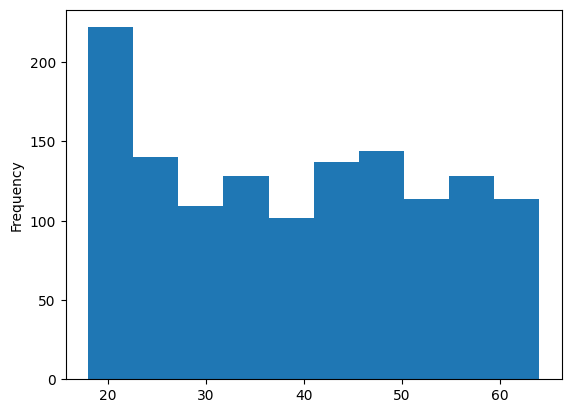

In [ ]:
df['age'].plot(kind = 'hist')

<Axes: xlabel='sex'>

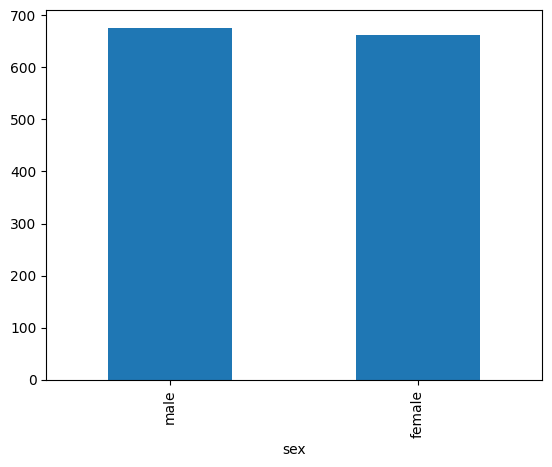

In [ ]:
df['sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='smoker'>

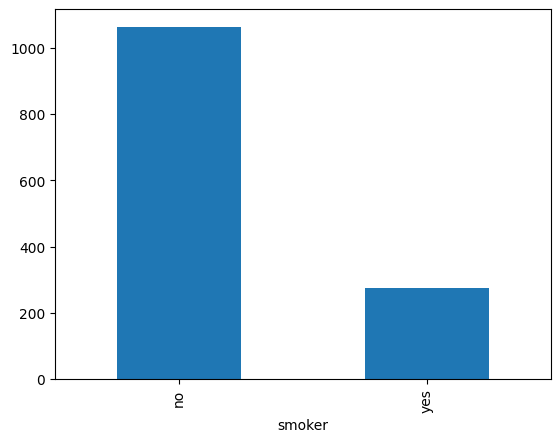

In [ ]:
df['smoker'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

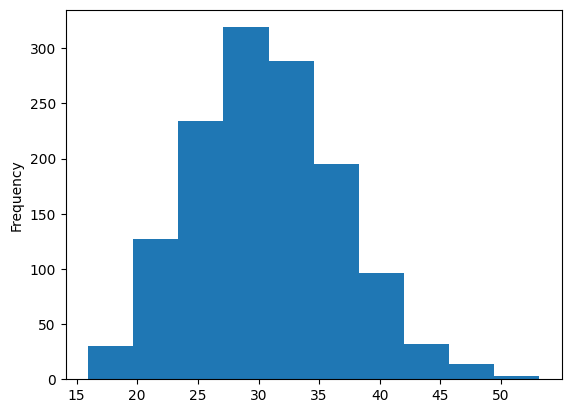

In [ ]:
df['bmi'].plot(kind = 'hist')

<Axes: xlabel='children'>

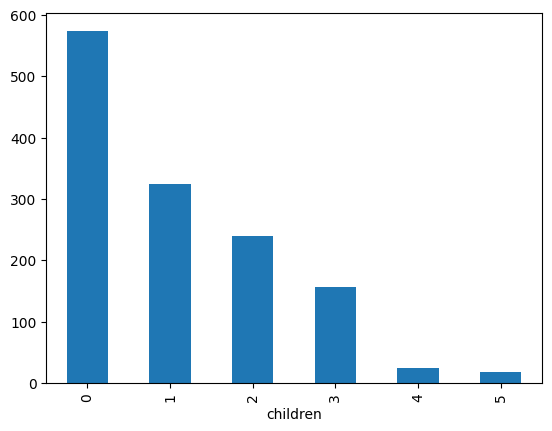

In [ ]:
df['children'].value_counts().plot(kind = 'bar')

<Axes: xlabel='region'>

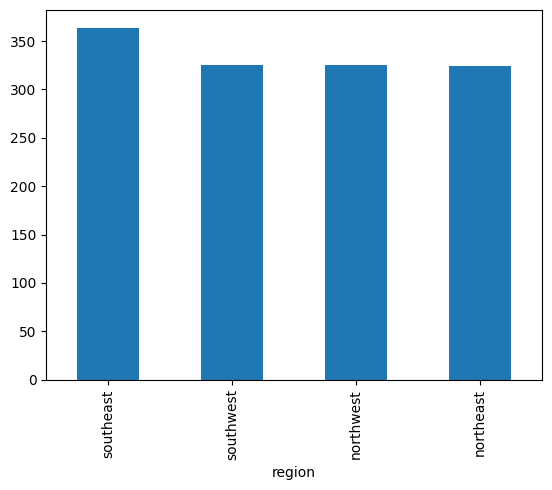

In [ ]:
df['region'].value_counts().plot(kind = 'bar')

<ipython-input-10-6c0ca72ca627>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, kde = True, ax = ax[0])
<ipython-input-10-6c0ca72ca627>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi, kde = True, ax = ax[1])


<Axes: xlabel='bmi', ylabel='Density'>

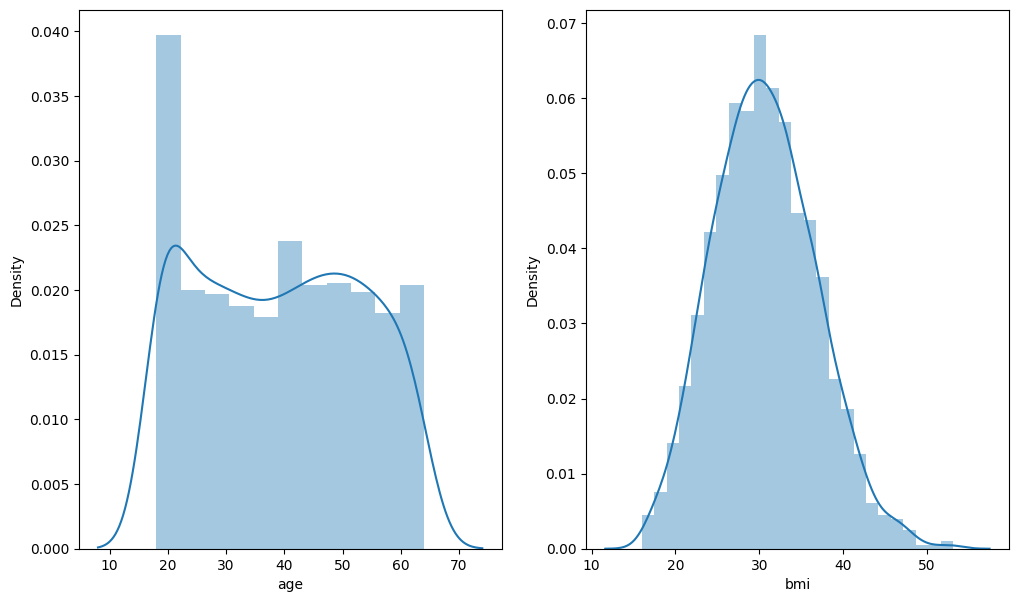

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
sns.distplot(df.age, kde = True, ax = ax[0])
sns.distplot(df.bmi, kde = True, ax = ax[1])

In [ ]:
s1 = df.groupby('smoker')['smoker'].count()
s2 = df.groupby('children')['children'].count()
fig = make_subplots(1, 2, specs = [[{'type': 'domain'}, {'type': 'domain'}]])
pie_trace1 = go.Pie(values = s1.values, labels = s1.index, name = "Smoker")
pie_trace2 = go.Pie(values = s2.values, labels = s2.index, name = "Children")
fig.add_trace(pie_trace1, 1, 1)
fig.add_trace(pie_trace2, 1, 2)
fig.update_layout(template = 'plotly_dark')
fig.add_annotation(
    text = 'Smoker Distribution',
    x = 0.1,
    y = 0.95
)

fig.add_annotation(
    text = 'Children Distribution',
    x = 0.7,
    y = 0.95
)

In [ ]:
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
x = df.drop(['charges'], axis = 1)

sc = MinMaxScaler()
y = sc.fit_transform(df['charges'].values.reshape(-1, 1))

print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [ ]:
print(y)

[[0.25161076]
 [0.00963595]
 [0.05311516]
 ...
 [0.00810808]
 [0.01414352]
 [0.44724873]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42, test_size = 0.2)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(tf.keras.layers.Dense(6, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (572.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = tf.keras.losses.mae, optimizer = 'adam', metrics = ['mse'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 100, batch_size = 16)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9299 - mse: 7.4782 - val_loss: 0.3311 - val_mse: 0.1663
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3005 - mse: 0.1439 - val_loss: 0.2689 - val_mse: 0.1214
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2609 - mse: 0.1089 - val_loss: 0.2328 - val_mse: 0.0895
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2118 - mse: 0.0777 - val_loss: 0.1932 - val_mse: 0.0625
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1766 - mse: 0.0586 - val_loss: 0.1625 - val_mse: 0.0491
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1548 - mse: 0.0517 - val_loss: 0.1393 - val_mse: 0.0391
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1313 - mse: 0.0387 - val_loss: 0.1285 - val_mse: 0.0408
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1226 - mse: 0.0346 - val_loss: 0.1230 - val_mse: 0.0392
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.107

In [ ]:
model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0557 - mse: 0.0117 


[0.05675211176276207, 0.012680944055318832]

In [ ]:
y_pred = model.predict(x_test)

mae = tf.keras.losses.MeanAbsoluteError()
loss = mae(y_test, y_pred)
loss = loss.numpy()
print(loss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0.056752108


Text(0, 0.5, 'Loss')

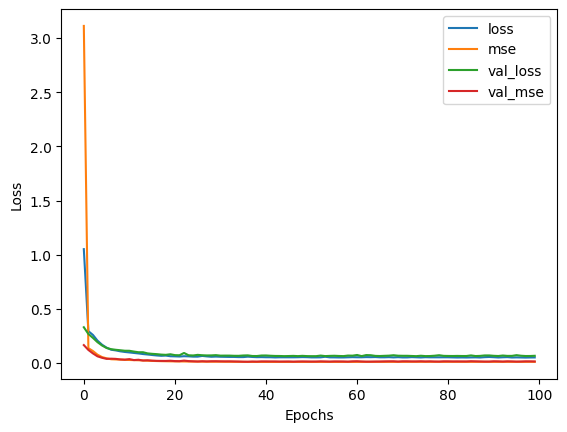

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')